# TP 4 - Fourier

Armar un aplicativo como el mostrado en este apunte, que permita la generación de TFs
directas e inversas de imágenes.

Probarlo con diferentes figuras geométricas y tratar de reproducir algunos de los
ejemplos vistos aquí.

Generar otros ejemplos (elipses, rombos, dos o más objetos, etc.).

Guardar el espectro de amplitud de una imagen en un bitmap, luedo editarlo con u
editor gráfico, y finalmente aplicar la transformada inversa (preservando la fase) para ver
los efectos.

In [1]:
%reset
%matplotlib inline

# Importamos numpy (libreria de calculo) y le asignamos el nombre "np"
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import misc


import time

import sys, os
sys.path.insert(0, 'Libreria')

import espacios_color as espc
import suma_y_resta as syr
import OpsHistLum as ophl
import superFT as sft


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
TEST_FOLDER = './Imagenes'
OUT_FOLDER = './Salidas'
ALPHA_VAL = 0.5
BETA_VAL = 1.2

TEST_IMAGE = 'Punto_blanco.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_P0 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_P0 = espc.rgb2yiq(imag_ini_P0)
TEST_IMAGE = 'Punto_blanco_chico.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_P1 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_P1 = espc.rgb2yiq(imag_ini_P1)
TEST_IMAGE = 'Punto_blanco_mas_chico.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_P2 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_P2 = espc.rgb2yiq(imag_ini_P2)

TEST_IMAGE = 'Cuadrado_blanco.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_C0 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_C0 = espc.rgb2yiq(imag_ini_C0)
TEST_IMAGE = 'Cuadrado_blanco_chico.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_C1 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_C1 = espc.rgb2yiq(imag_ini_C1)
TEST_IMAGE = 'Cuadrado_blanco_mas_chico.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_C2 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_C2 = espc.rgb2yiq(imag_ini_C2)


TEST_IMAGE = 'Hexagono_blanco.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_H0 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_H0 = espc.rgb2yiq(imag_ini_H0)
TEST_IMAGE = 'Hexagono_blanco_chico.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_H1 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_H1 = espc.rgb2yiq(imag_ini_H1)
TEST_IMAGE = 'Hexagono_blanco_mas_chico.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_H2 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_H2 = espc.rgb2yiq(imag_ini_H2)

TEST_IMAGE = 'Hexagono_y_Circulo.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_HC0 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_HC0 = espc.rgb2yiq(imag_ini_HC0)
TEST_IMAGE = 'Hexagono_y_Circulo_mas_chico.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_HC1 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_HC1 = espc.rgb2yiq(imag_ini_HC1)
TEST_IMAGE = 'Hexagono_y_Circulo_x4.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_HC4 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_HC4 = espc.rgb2yiq(imag_ini_HC4)




/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if sys.path[0] == '':
/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  app.launch_new_instance()
/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `imread` is deprecated!
`imread

# Transformadas de Fourier

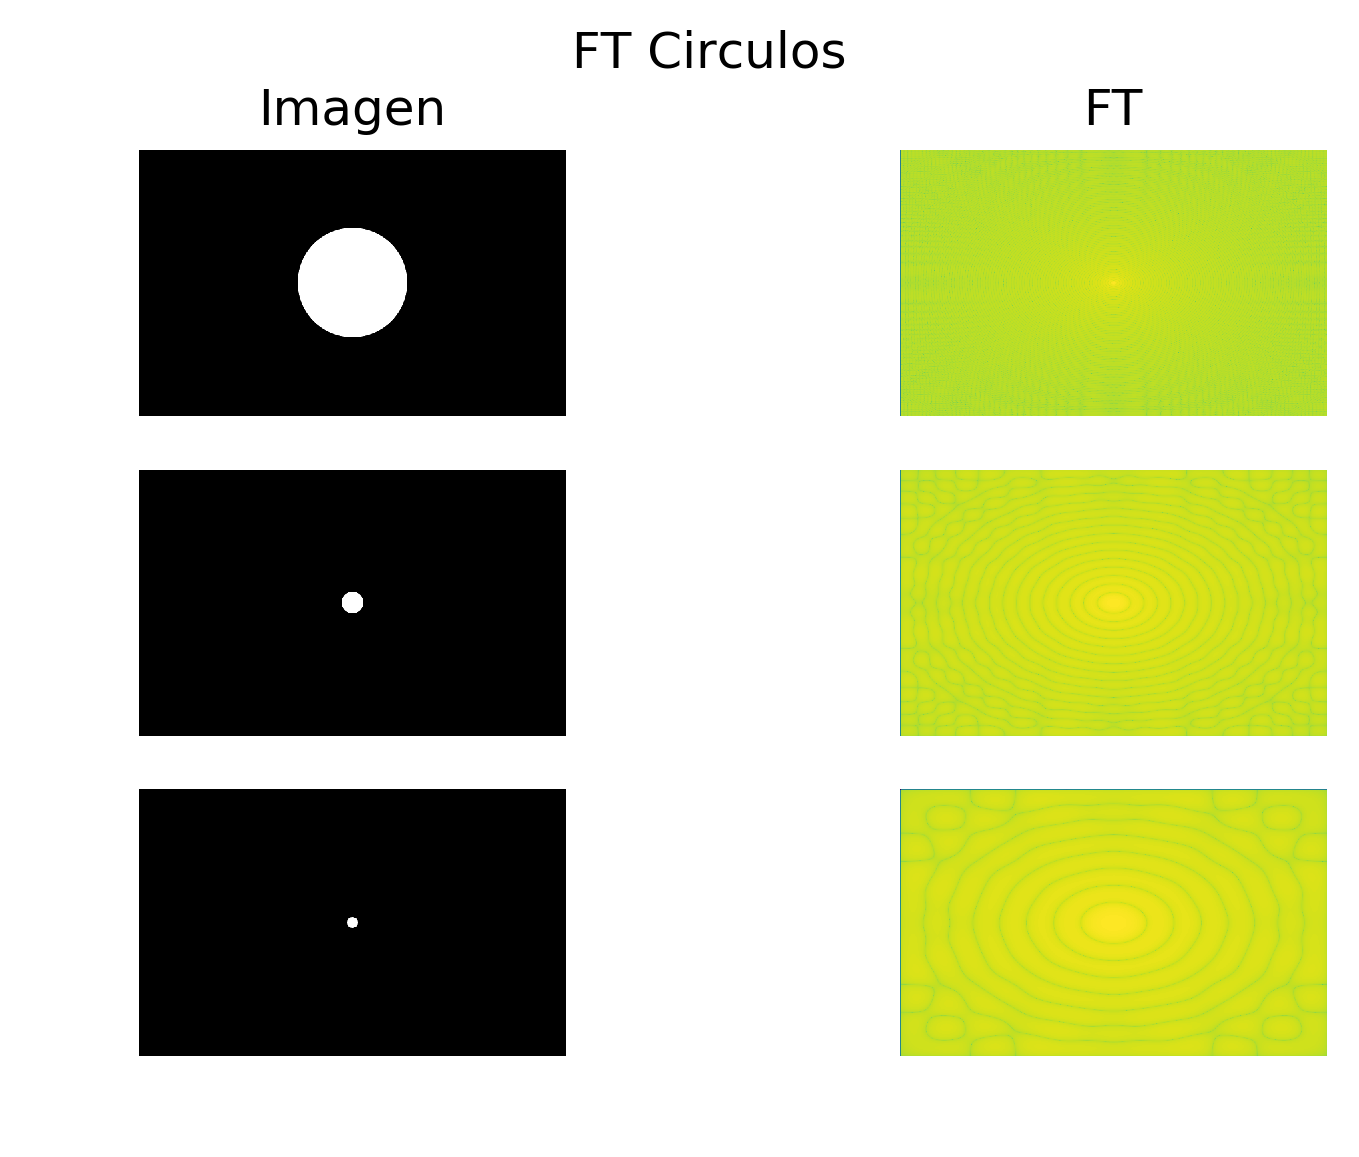

In [3]:
fig = plt.figure(dpi=300)

fig.suptitle('FT Circulos')

ax = plt.subplot(3,2,1)
ax.imshow(imag_ini_P0)
plt.axis('off')
plt.title('Imagen')
ax = plt.subplot(3,2,2)
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_P0)
ax.imshow(imag_fft_mod)
plt.axis('off')
plt.title('FT')
ax = plt.subplot(3,2,3)
ax.imshow(imag_ini_P1)
plt.axis('off')
ax = plt.subplot(3,2,4)
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_P1)
ax.imshow(imag_fft_mod)
plt.axis('off')
ax = plt.subplot(3,2,5)
ax.imshow(imag_ini_P2)
plt.axis('off')
ax = plt.subplot(3,2,6)
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_P2)
ax.imshow(imag_fft_mod)
plt.axis('off')

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP4_FT_Circulos.png')
plt.savefig(nom_arch)

plt.show()



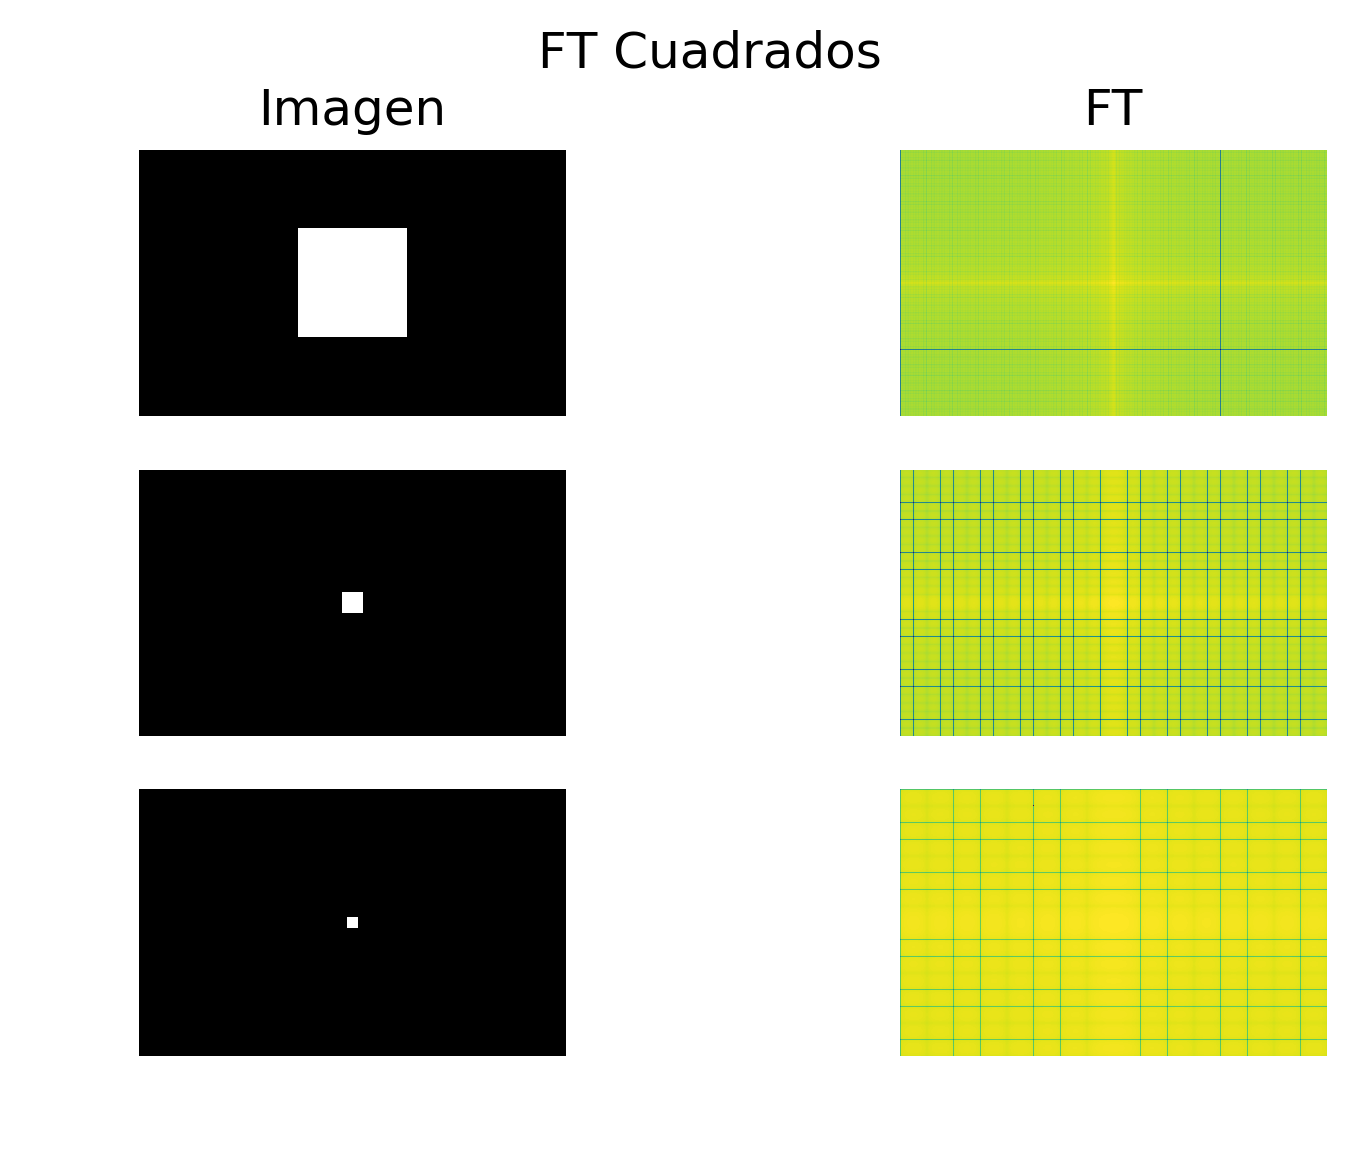

In [4]:

fig = plt.figure(dpi=300)

fig.suptitle('FT Cuadrados')

ax = plt.subplot(3,2,1)
ax.imshow(imag_ini_C0)
plt.axis('off')
plt.title('Imagen')
ax = plt.subplot(3,2,2)
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_C0)
ax.imshow(imag_fft_mod)
plt.axis('off')
plt.title('FT')
ax = plt.subplot(3,2,3)
ax.imshow(imag_ini_C1)
plt.axis('off')
ax = plt.subplot(3,2,4)
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_C1)
ax.imshow(imag_fft_mod)
plt.axis('off')
ax = plt.subplot(3,2,5)
ax.imshow(imag_ini_C2)
plt.axis('off')
ax = plt.subplot(3,2,6)
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_C2)
ax.imshow(imag_fft_mod)
plt.axis('off')

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP4_FT_Cuadrados.png')
plt.savefig(nom_arch)

plt.show()

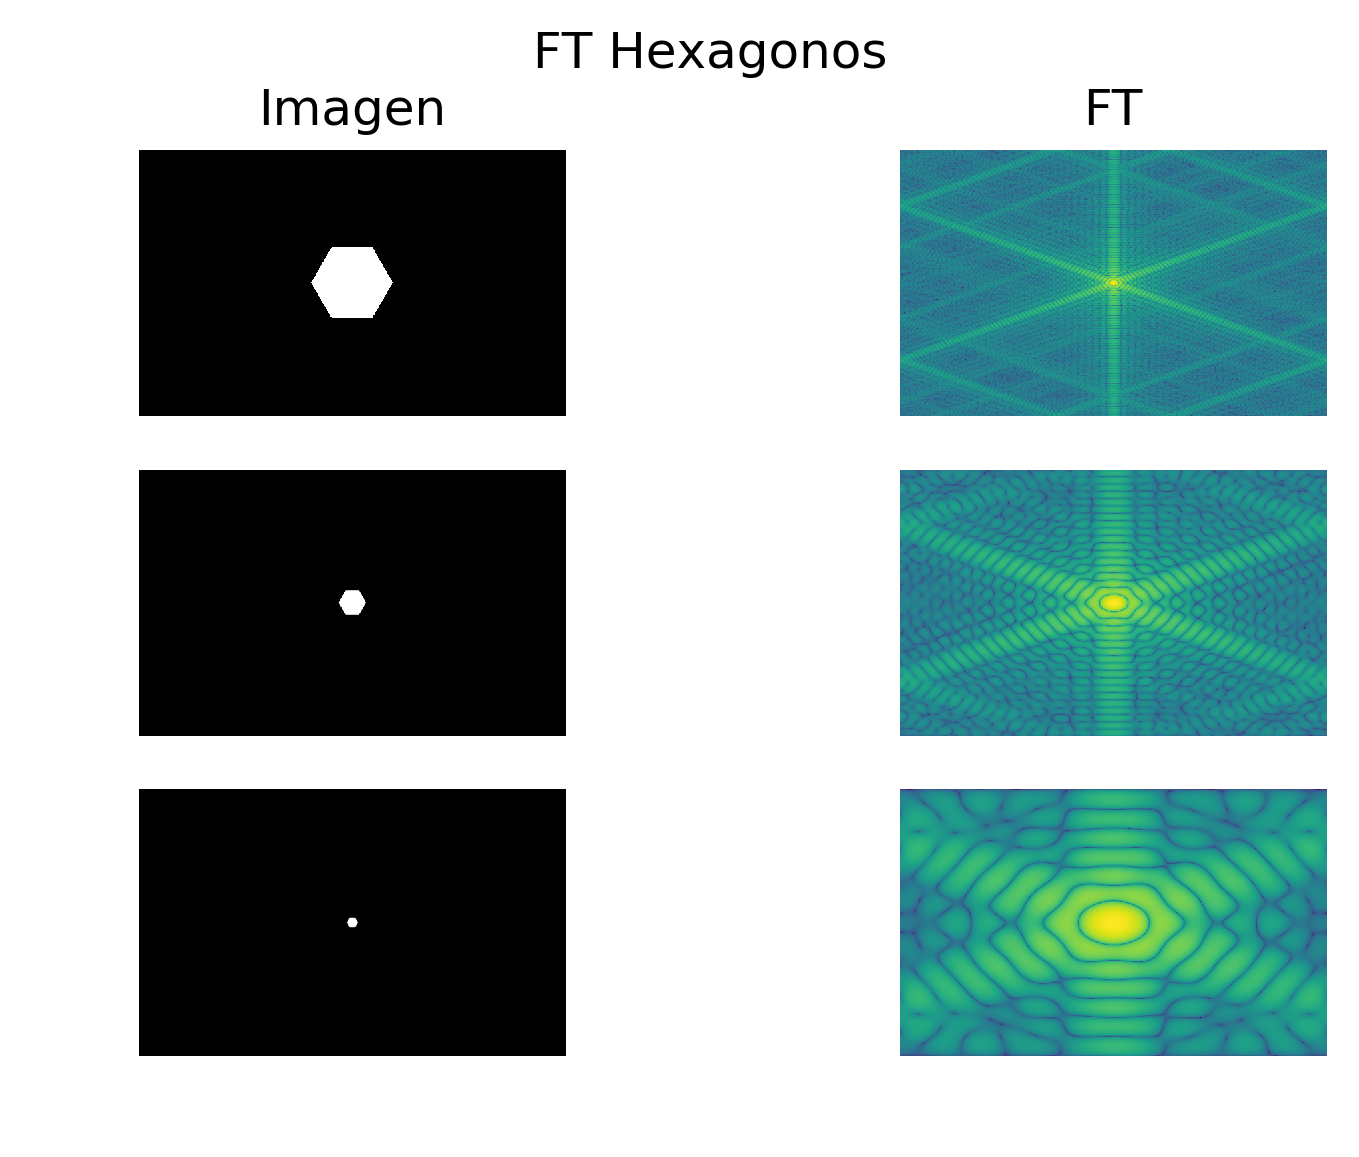

In [5]:
fig = plt.figure(dpi=300)

fig.suptitle('FT Hexagonos')

ax = plt.subplot(3,2,1)
ax.imshow(imag_ini_H0)
plt.axis('off')
plt.title('Imagen')
ax = plt.subplot(3,2,2)
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_H0)
ax.imshow(imag_fft_mod)
plt.axis('off')
plt.title('FT')
ax = plt.subplot(3,2,3)
ax.imshow(imag_ini_H1)
plt.axis('off')
ax = plt.subplot(3,2,4)
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_H1)
ax.imshow(imag_fft_mod)
plt.axis('off')
ax = plt.subplot(3,2,5)
ax.imshow(imag_ini_H2)
plt.axis('off')
ax = plt.subplot(3,2,6)
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_H2)
ax.imshow(imag_fft_mod)
plt.axis('off')

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP4_FT_Hexagonos.png')
plt.savefig(nom_arch)

plt.show()

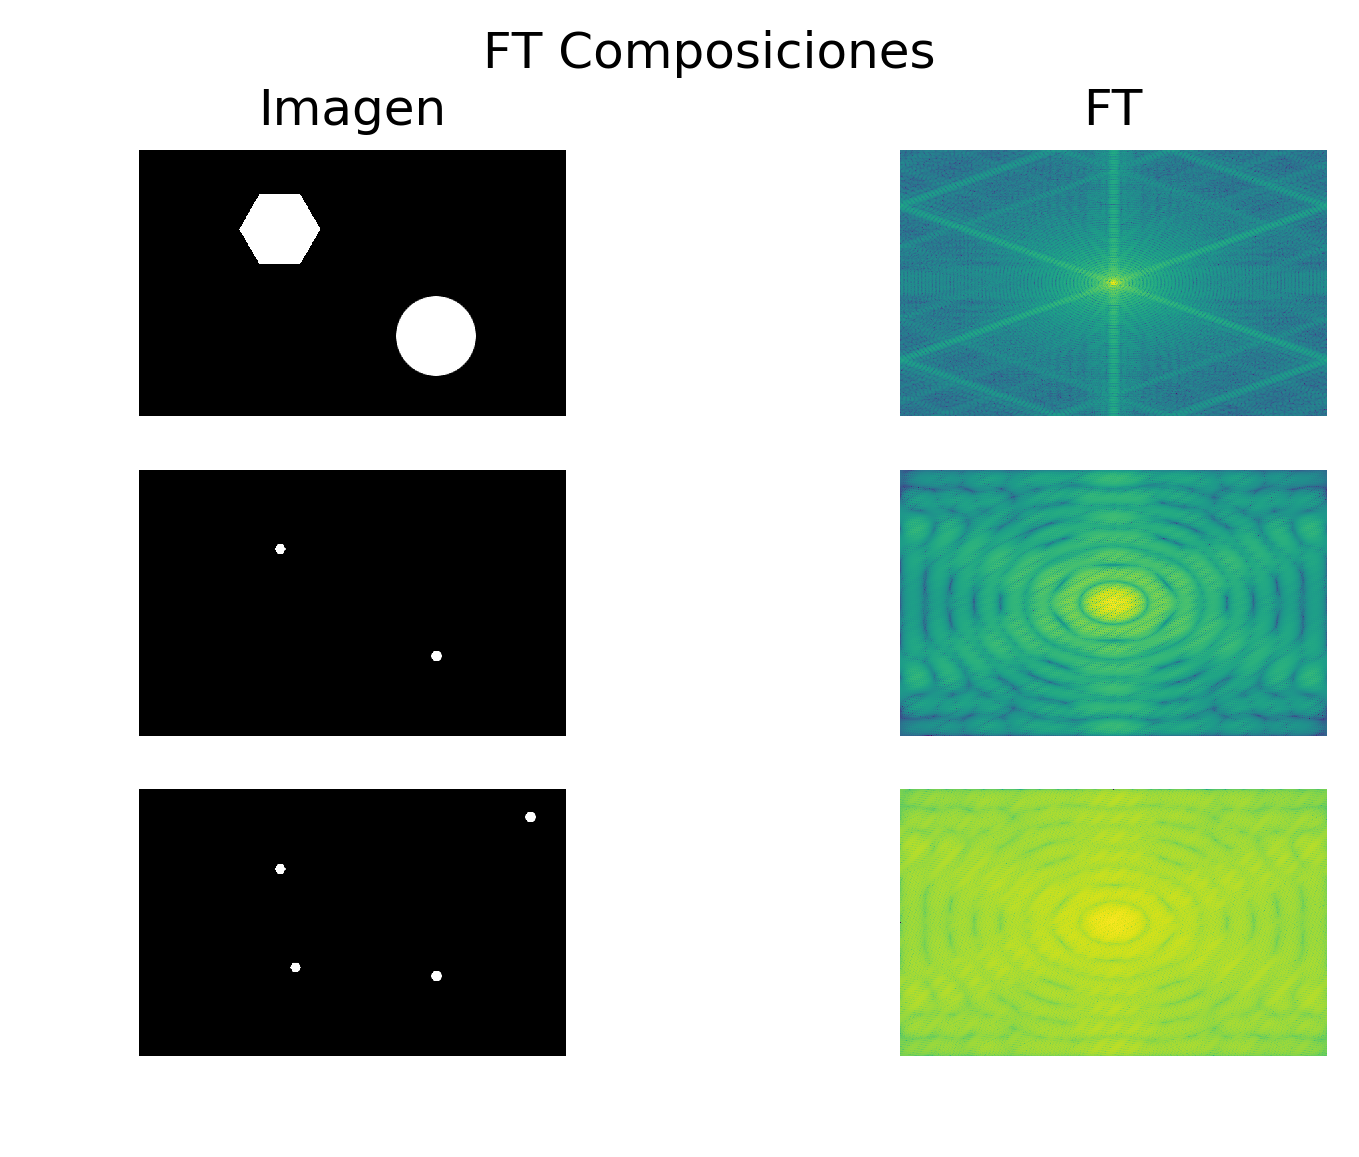

In [6]:
fig = plt.figure(dpi=300)

fig.suptitle('FT Composiciones')

ax = plt.subplot(3,2,1)
ax.imshow(imag_ini_HC0)
plt.axis('off')
plt.title('Imagen')
ax = plt.subplot(3,2,2)
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_HC0)
ax.imshow(imag_fft_mod)
plt.axis('off')
plt.title('FT')
ax = plt.subplot(3,2,3)
ax.imshow(imag_ini_HC1)
plt.axis('off')
ax = plt.subplot(3,2,4)
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_HC1)
ax.imshow(imag_fft_mod)
plt.axis('off')
ax = plt.subplot(3,2,5)
ax.imshow(imag_ini_HC4)
plt.axis('off')
ax = plt.subplot(3,2,6)
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_HC4)
ax.imshow(imag_fft_mod)
plt.axis('off')

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP4_FT_Composiciones.png')
plt.savefig(nom_arch)

plt.show()

# Transformación inversa

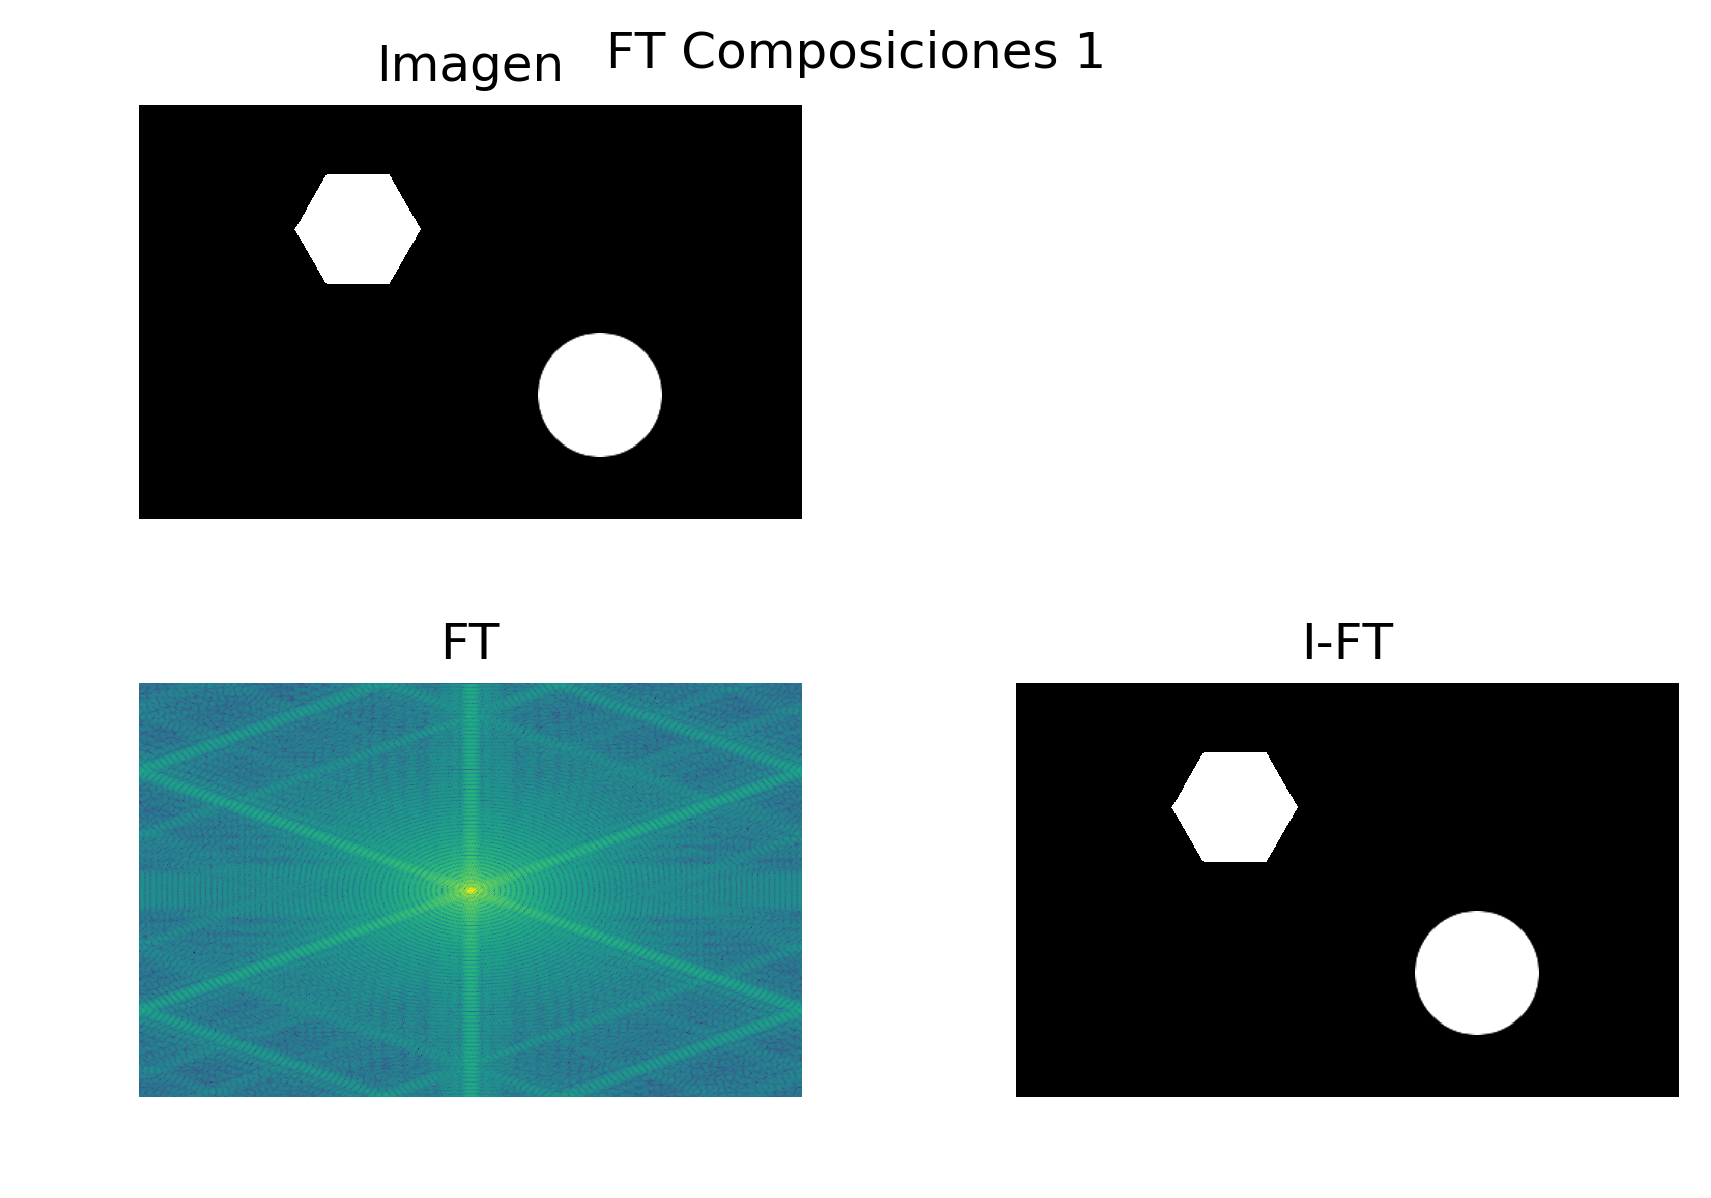

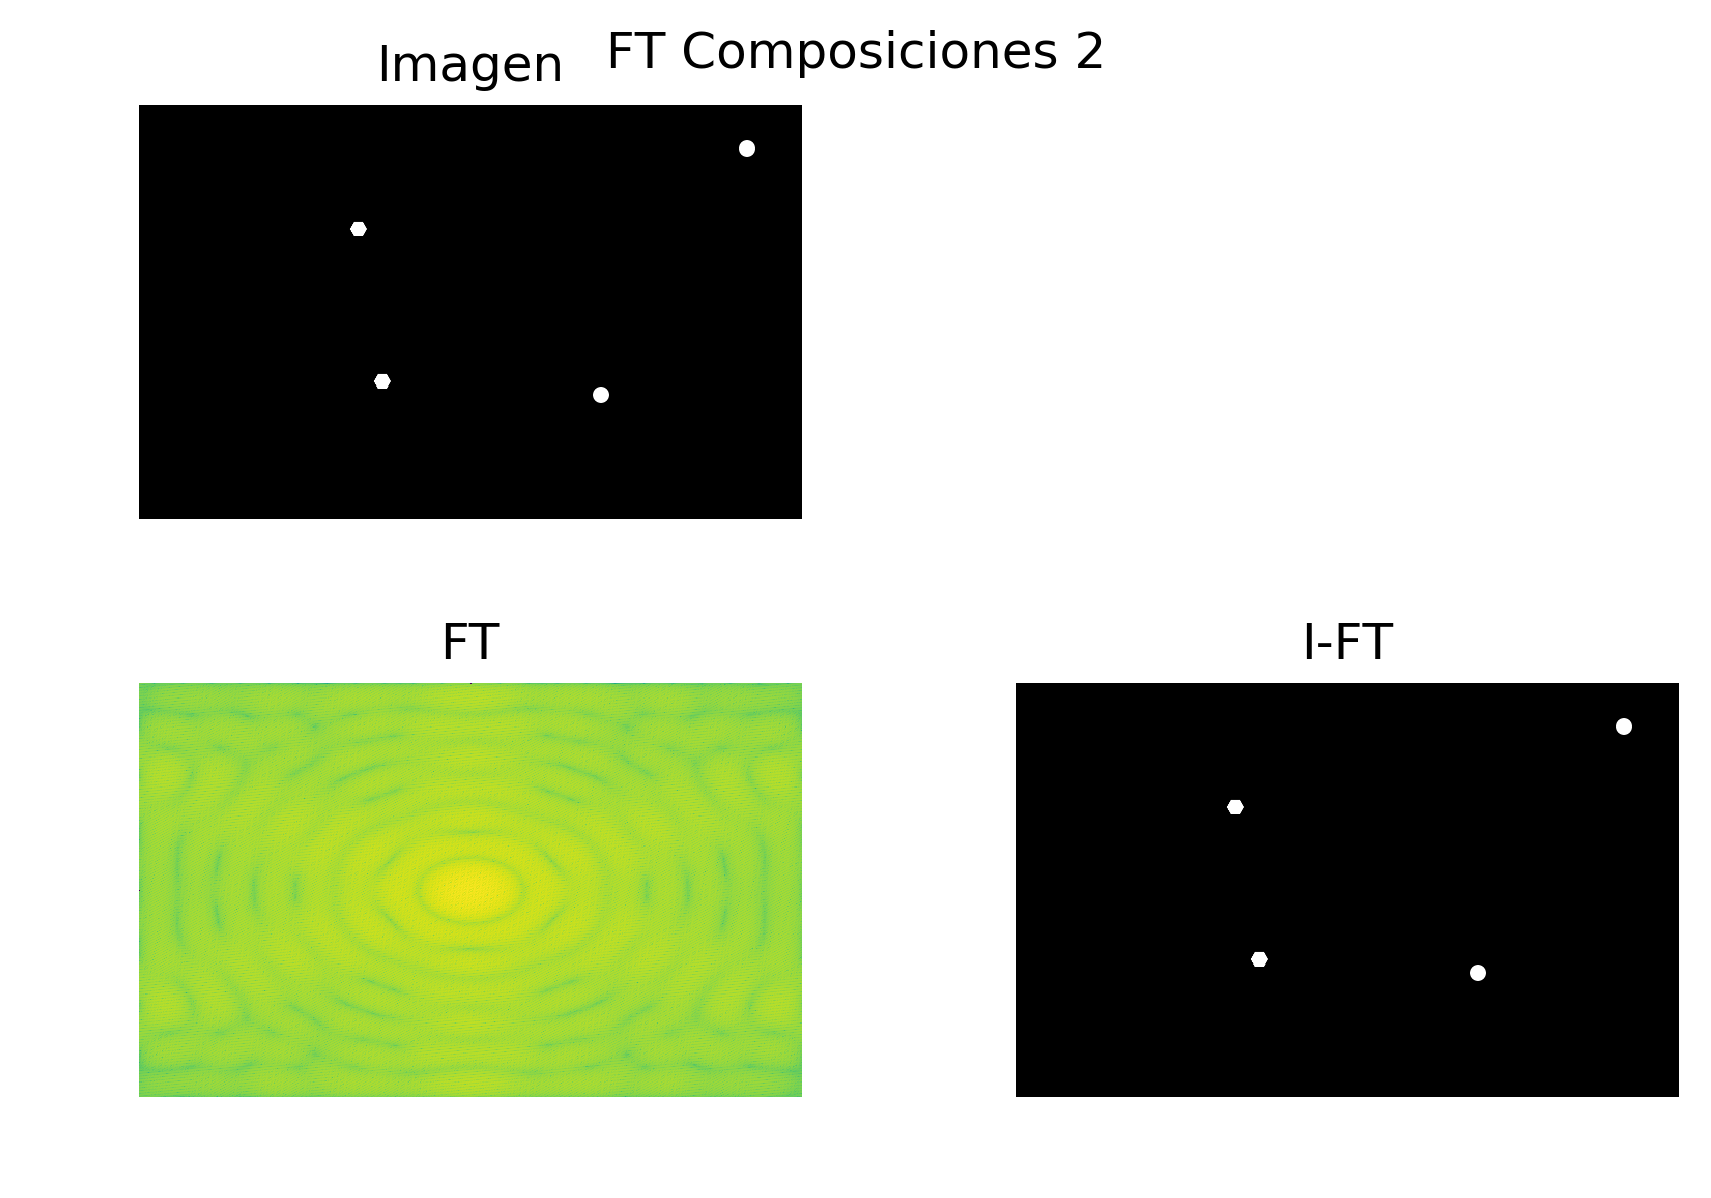

In [7]:
# Transformo
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_HC0)
# Des-Transformo
imagen_destransf = sft.super_invfft2D(imag_fft_mod, imag_fft_fase)


fig = plt.figure(dpi=300)

fig.suptitle('FT Composiciones 1')

ax = plt.subplot(2,2,1)
ax.imshow(imag_ini_HC0)
plt.axis('off')
plt.title('Imagen')
ax = plt.subplot(2,2,3)
ax.imshow(imag_fft_mod)
plt.axis('off')
plt.title('FT')
ax = plt.subplot(2,2,4)
ax.imshow(imagen_destransf,cmap='gray')
plt.axis('off')
plt.title('I-FT')

plt.tight_layout()

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP4_IFT_Composiciones_1.png')
plt.savefig(nom_arch)

plt.show()


# Transformo
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_HC4)
# Des-Transformo
imagen_destransf = sft.super_invfft2D(imag_fft_mod, imag_fft_fase)



fig = plt.figure(dpi=300)

fig.suptitle('FT Composiciones 2')

ax = plt.subplot(2,2,1)
ax.imshow(imag_ini_HC4)
plt.axis('off')
plt.title('Imagen')
ax = plt.subplot(2,2,3)
ax.imshow(imag_fft_mod)
plt.axis('off')
plt.title('FT')
ax = plt.subplot(2,2,4)
ax.imshow(imagen_destransf,cmap='gray')
plt.axis('off')
plt.title('I-FT')

plt.tight_layout()

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP4_IFT_Composiciones_2.png')
plt.savefig(nom_arch)

plt.show()

# Edicion de Espectro

/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  from ipykernel import kernelapp as app
/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


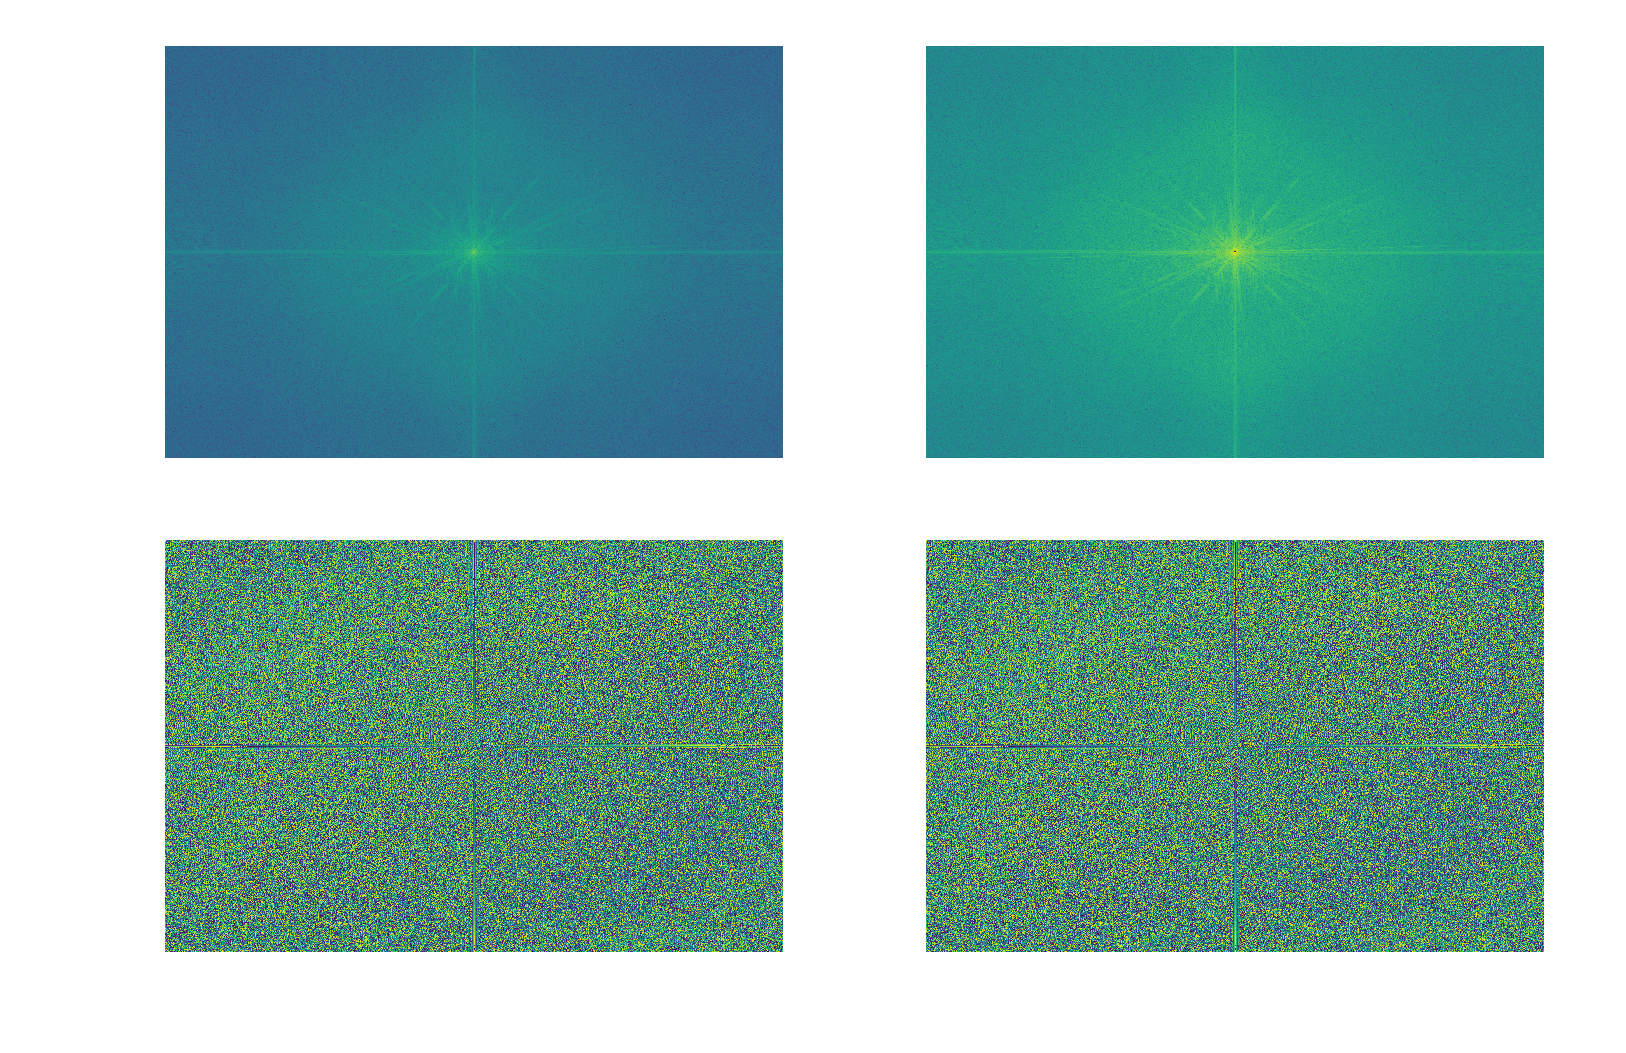

In [8]:
# Cargo
TEST_IMAGE = 'spacex-rocket-pictures.jpg'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_ini_R0 = ndimage.imread(nom_arch, flatten=False, mode='RGB')
imag_yiq_R0 = espc.rgb2yiq(imag_ini_R0)


# Transformo y guardo
imag_fft_mod, imag_fft_fase = sft.super_fft2D(imag_yiq_R0)

nom_arch = os.path.join(TEST_FOLDER,'spacex-rocket_modulo.png')
imag_save = np.copy(imag_fft_mod)
imag_save = ((imag_save+75.0)/(255.0/np.sqrt(2)))*255.0
imag_save = imag_save.astype(np.uint8)
misc.imsave(nom_arch, imag_save)



plt.figure(dpi=300)
ax = plt.subplot(2,2,1)
ax.imshow(imag_fft_mod)
plt.axis('off')
ax = plt.subplot(2,2,2)
ax.imshow(imag_save)
plt.axis('off')

nom_arch = os.path.join(TEST_FOLDER,'spacex-rocket_fase.png')
imag_save = np.copy(imag_fft_fase)
imag_save = ((imag_save+np.pi)/(2*np.pi))*255.0
imag_save = imag_save.astype(np.uint8)
misc.imsave(nom_arch, imag_save)



ax = plt.subplot(2,2,3)
ax.imshow(imag_fft_fase)
plt.axis('off')
ax = plt.subplot(2,2,4)
ax.imshow(imag_save)
plt.axis('off')

plt.show()


In [11]:
# Levanto el modulo y la fase editados


TEST_IMAGE = 'spacex-rocket_fase.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_fase_EDIT = ndimage.imread(nom_arch, flatten=False, mode='L')

imag_fase_EDIT = ((imag_fase_EDIT.astype(np.float32)/255.0)*(2*np.pi)) - np.pi

TEST_IMAGE = 'spacex-rocket_modulo_EDIT.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_mod_EDIT_1 = ndimage.imread(nom_arch, flatten=False, mode='L')

TEST_IMAGE = 'spacex-rocket_modulo_EDIT_2.png'
nom_arch = os.path.join(TEST_FOLDER,TEST_IMAGE)
imag_mod_EDIT_2 = ndimage.imread(nom_arch, flatten=False, mode='L')

imag_mod_EDIT_1 = ((imag_mod_EDIT_1.astype(np.float32)/255.0)*(255.0/np.sqrt(2))) - 75.0
imag_mod_EDIT_2 = ((imag_mod_EDIT_2.astype(np.float32)/255.0)*(255.0/np.sqrt(2))) - 75.0


/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if sys.path[0] == '':
/home/rgrodriguez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  app.launch_new_instance()


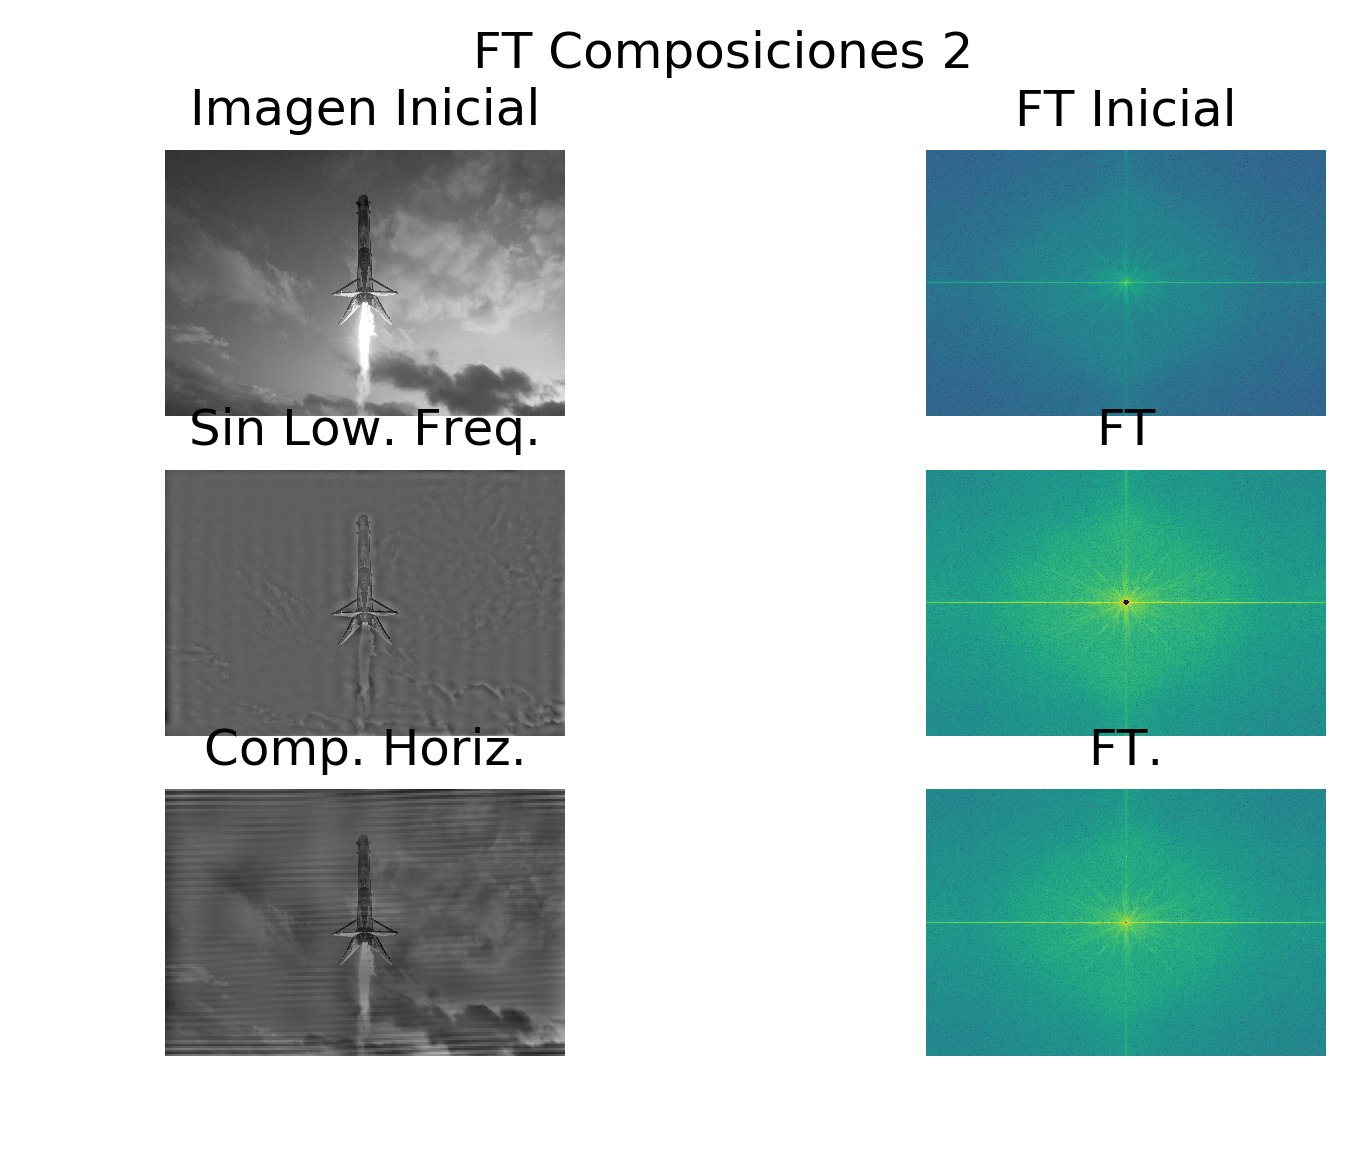

In [18]:
# Des-Transformo
imagen_destransf_1 = sft.super_invfft2D(imag_mod_EDIT_1, imag_fase_EDIT)
imagen_destransf_2 = sft.super_invfft2D(imag_mod_EDIT_2, imag_fase_EDIT)

fig = plt.figure(dpi=300)

fig.suptitle('FT Composiciones 2')

ax = plt.subplot(3,2,1)
ax.imshow(imag_yiq_R0[:,:,0],cmap='gray')
plt.axis('off')
plt.title('Imagen Inicial')
ax = plt.subplot(3,2,2)
ax.imshow(imag_fft_mod)
plt.axis('off')
plt.title('FT Inicial')

ax = plt.subplot(3,2,3)
ax.imshow(imagen_destransf_2,cmap='gray')
plt.axis('off')
plt.title('Sin Low. Freq.')
ax = plt.subplot(3,2,4)
ax.imshow(imag_mod_EDIT_2)
plt.axis('off')
plt.title('FT')

ax = plt.subplot(3,2,5)
ax.imshow(imagen_destransf_1,cmap='gray')
plt.axis('off')
plt.title('Comp. Horiz.')
ax = plt.subplot(3,2,6)
ax.imshow(imag_mod_EDIT_1)
plt.axis('off')
plt.title('FT.')

# plt.tight_layout()

plt.draw()
nom_arch = os.path.join(OUT_FOLDER,'TP4_Edicion_Modulo.png')
plt.savefig(nom_arch)

plt.show()